# Zero correlation model

In [1]:
# Import modules

from matplotlib import pyplot as plt
import os

import pickle

%matplotlib inline

In [2]:
def zero_correlation_plot(ticker, days, t_step):
    """
    Plot the zero correlation model during an interval of time (days) in
    independent plots in a figure. The data is loaded from the zero
    correlation model data results.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param days: string with the days to be analized
         (i.e ['07', '08', '09'])
        :param t_step: time step in the data in ms
    """
    plt.figure(figsize=(9, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for d, day in enumerate(days):

        print('Processing data for the stock ' + ticker + ' the day ' + day
              + ' March, 2016')

        plot = pickle.load(open("".join((
         '../Data/zero_correlation_data_{}ms/zero_correlation_201603{}_{}i'
         + '_rand_{}ms.pickl').split())
         .format(t_step, day, ticker, t_step), 'rb'))

        plt.subplot(5, 1, d+1)
        plt.semilogx(plot, '-g', label='Stock i {} and random trade sign - {}'
                     .format(ticker, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Self response random $ R_{ii} (\tau)_{rand} $')
        plt.title('Zero correlation - ticker i {} - {}ms'
                  .format(ticker, t_step))
        plt.legend(loc='best')
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

    if (not os.path.isdir('../Data/zero_correlation_plot_{}ms/'
                          .format(t_step))):
        os.mkdir('../Data/zero_correlation_plot_{}ms/'.format(t_step))
        print('Folder to save plot created')

    plt.savefig(
        '../Data/zero_correlation_plot_{}ms/zero_corr_{}_{}ms.png'
        .format(t_step, ticker, t_step))

    return None

In [3]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
days = ['07','08','09','10','11']
tau_val = 1000
t_step = 1000

Processing data for the stock AAPL the day 07 March, 2016
Processing data for the stock AAPL the day 08 March, 2016
Processing data for the stock AAPL the day 09 March, 2016
Processing data for the stock AAPL the day 10 March, 2016
Processing data for the stock AAPL the day 11 March, 2016


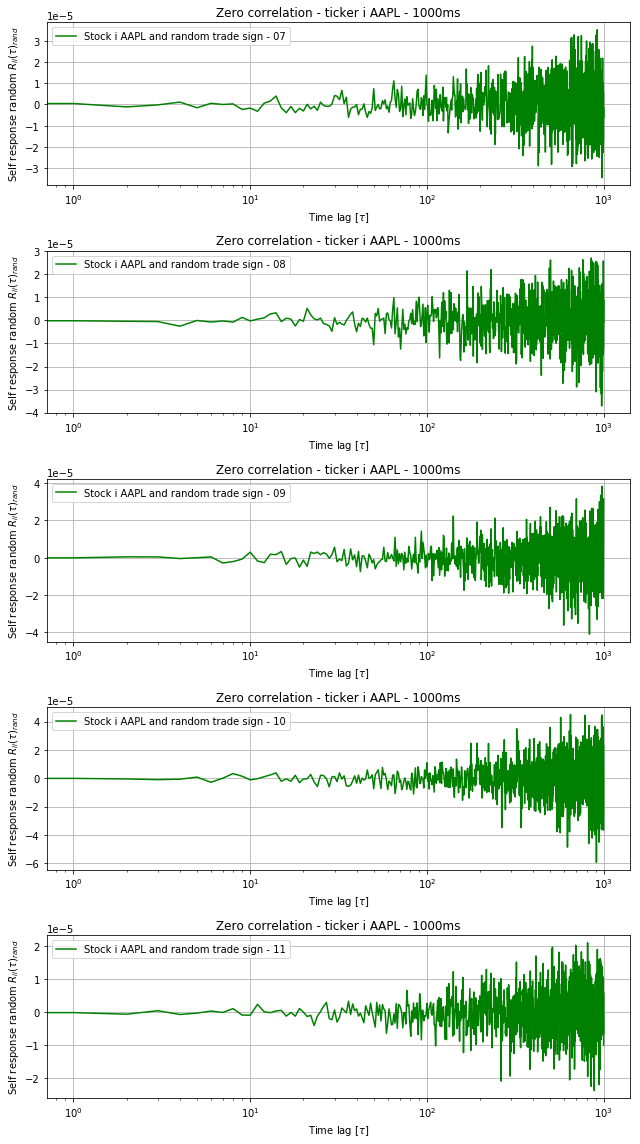

In [4]:
zero_correlation_plot(ticker_i, days, t_step)